In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections.abc import MutableMapping

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy
import cv2
import tensorflow as tf
#from tensorflow.keras.applications import VGG19
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
import weightwatcher as ww
import torchvision
import torchvision.models as models

ImportError: cannot import name 'MutableSequence' from 'collections' (c:\Users\zaida\AppData\Local\Programs\Python\Python310\lib\collections\__init__.py)

#  Building our Model To train the data 

In [3]:
# Working with pre trained model 
base_model = models.vgg19_bn(input_shape=(224,224,3),include_top=False,weights="train")
#base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

80150528/80134624 [==============================] - 12s 0us/step


In [4]:
model.compile(optimizer='Adam', loss= categorical_crossentropy, metrics=['accuracy']  )

# Preparing our data using data generator

In [5]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [6]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

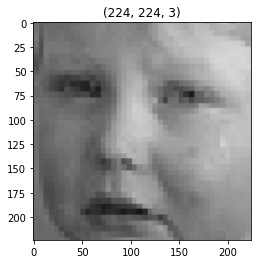

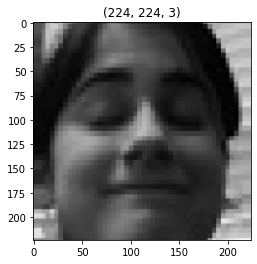

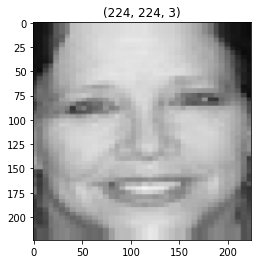

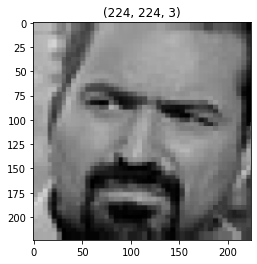

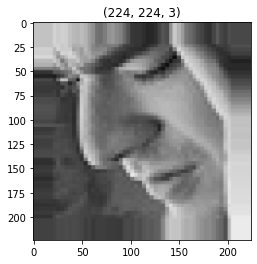

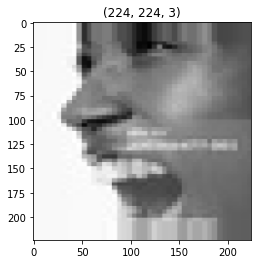

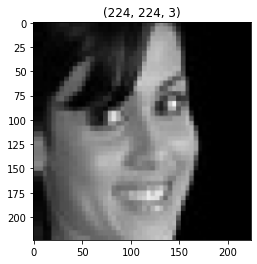

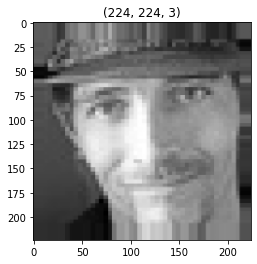

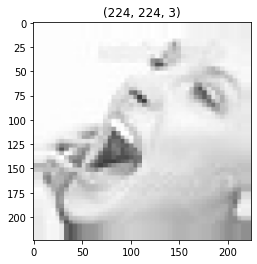

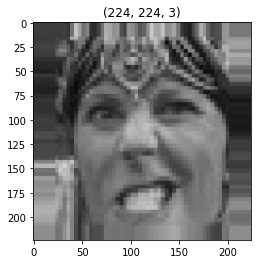

In [7]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [8]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [9]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

C:\Users\zaida\AppData\Local\Temp\ipykernel_20884\564963302.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 2.6912 - accuracy: 0.2156 
Epoch 1: val_accuracy improved from -inf to 0.25781, saving model to best_model.h5
10/10 [==============================] - 350s 37s/step - loss: 2.6912 - accuracy: 0.2156 - val_loss: 2.1361 - val_accuracy: 0.2578
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 2.0300 - accuracy: 0.2562 
Epoch 2: val_accuracy improved from 0.25781 to 0.28516, saving model to best_model.h5
10/10 [==============================] - 375s 38s/step - loss: 2.0300 - accuracy: 0.2562 - val_loss: 2.1203 - val_accuracy: 0.2852
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.9780 - accuracy: 0.2750 
Epoch 3: val_accuracy improved from 0.28516 to 0.33594, saving model to best_model.h5
10/10 [==============================] - 337s 35s/step - loss: 1.9780 - accuracy: 0.2750 - val_loss: 1.6588 - val_accuracy: 0.3359
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss:

In [12]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.h5")

In [12]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

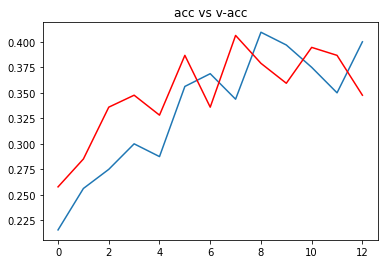

In [13]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

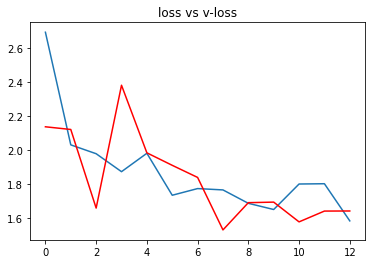

In [14]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [16]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [8]:
import cv2

face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

cap=cv2.VideoCapture(0)

while cap.isOpened():
    _,img=cap.read()
    
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 3)
       
    #crop_img = img[y:y+h, x:x+w]
    cv2.imshow('img',img)
    cv2.imwrite("test.jpg",img)
    if cv2.waitKey(125) & 0xFF == ord('q'):
        break
    

cap.release()

: 

In [19]:
img = load_img("test.jpg", target_size=(224,224))
crop_img = img[y:y+h, x:x+w]
cv2.imshow("cropped", crop_img)

NameError: name 'y' is not defined

In [ ]:
# path for the image to see if it predics correct class

img = load_img("test.jpg", target_size=(224,224))

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()